In [1]:
import os
import numpy as np
import math
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

2024-04-15 08:54:04.476882: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-15 08:54:04.549070: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-15 08:54:04.550731: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-15 08:54:05.749839: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#!unzip -q '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/archive.zip'

In [17]:
train_directory = '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/Covid19-dataset/train'
test_directory = '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/Covid19-dataset/test'

In [4]:
#num_skipped = 0
#for folder_name in (train_directory,test_directory):
#    max_images=100
 #   folder_path = os.path.join('Covid19-dataset',folder_name)
  #  for images_i,fname in enumerate(os.listdir(folder_path)):
   #     fpath = os.path.join(folder_path,fname)
    #    try:
     #       fobj = open(fpath,"rb")
      #      is_jfif = b"JFIF" in fobj.peek(10)
       # finally:
        #    fobj.close()
        #if image_i > max_images or not is_jfif:
         #   num_skipped += 1
          #  os.remove(fpath) # removes corrupted images

#print(f"Deleted {num_skipped} images.")

In [23]:
img_size = (224,224)
batch_size = 15

train_ds, val_ds = keras.utils.image_dataset_from_directory(
        train_directory,
        validation_split=0.2,
        subset='both',
        seed = 1337,
        image_size = img_size,
        batch_size=batch_size)

Found 251 files belonging to 3 classes.
Using 201 files for training.
Using 50 files for validation.


## Labels for Images
- 0: Normal
- 1: Viral Pneumonia
- 2: Covid

2024-04-15 09:03:28.590609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [201]
	 [[{{node Placeholder/_4}}]]
2024-04-15 09:03:28.591670: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [201]
	 [[{{node Placeholder/_0}}]]


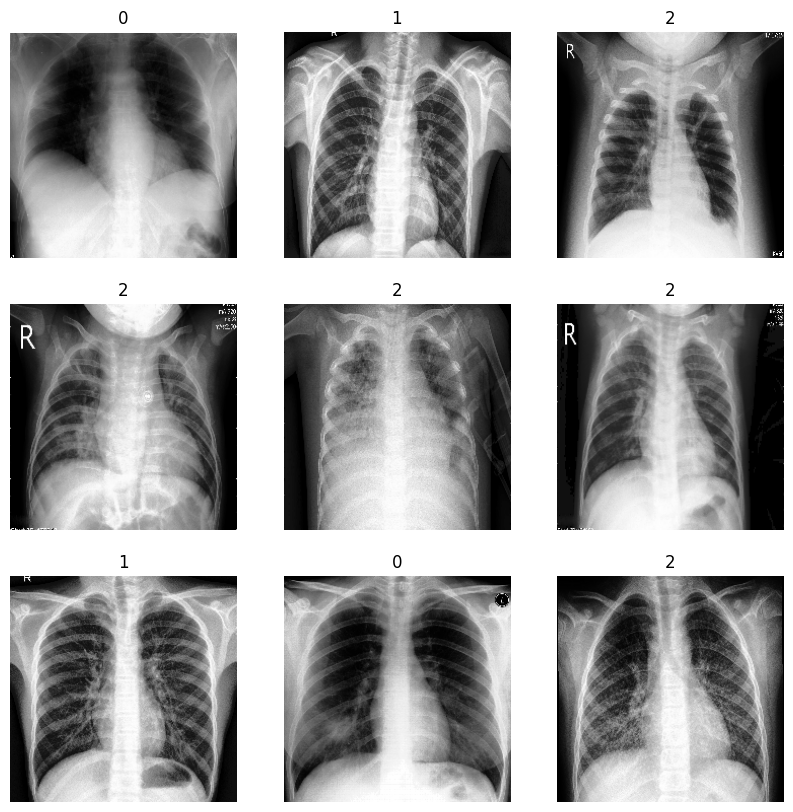

In [22]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")